## Data Preprocessing


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer



### Loading the Dataset

In [2]:
df = pd.read_csv('FNI_dataset.csv')


### checking random samples of given dataset

In [3]:
df.sample(10)

,title,text,Label
32092,Trump ally Christie calls criticisms of slain ...,"WASHINGTON (Reuters) - Chris Christie, a close...",True
25343,Trump on Hurricane Irma: 'This is some big mon...,WASHINGTON (Reuters) - U.S. President Donald T...,True
25362,Trump anger at Cohn raises doubts about his Wh...,BOSTON/WASHINGTON (Reuters) - A newly fraying ...,True
31160,Tech billionaire Thiel says Trump movement 'no...,WASHINGTON (Reuters) - Billionaire technology ...,True
42312,"Islamic State's Baghdadi, in undated audio, ur...",CAIRO (Reuters) - Islamic State leader Abu Bak...,True
20003,WILL TRUMP PULL A ROMNEY In His First Debate...,Who could forget Mitt Romney s second and thir...,Fake
38978,Ex-Catalan leader urges unity as window for se...,MADRID (Reuters) - Catalonia s deposed leader ...,True
24091,Trump: Father of UCLA player in shoplifting ca...,(Reuters) - U.S. President Donald Trump on Wed...,True
1534,Former McCain Chief Of Staff Thinks U.S. Need...,Things just keep getting stranger for Republic...,Fake
14514,OBAMA WILL SKIP SCALIA FUNERAL: Heres A List ...,With a battle heating up between Republicans a...,Fake


### Data Cleaning

#### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44954 entries, 0 to 44953
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   Label   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


#### Missing Values

In [5]:
df.isnull().sum()

title    56
text     56
Label    56
dtype: int64

In [6]:
# Cleaning null values
df_cleaned = df.dropna(how='all')


#### Duplicated Value

In [7]:
df.duplicated().sum()

5848

#### Removing Duplicated values

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(39106, 3)

In [11]:
df.isnull().sum()

title    1
text     1
Label    1
dtype: int64

## Exploratory Data Analysis

In [12]:
df.head()

,title,text,Label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


#### Analysis of Label

In [13]:
#counts no. of True and Fake data
df['Label'].value_counts()


Label
True    21196
Fake    17909
Name: count, dtype: int64

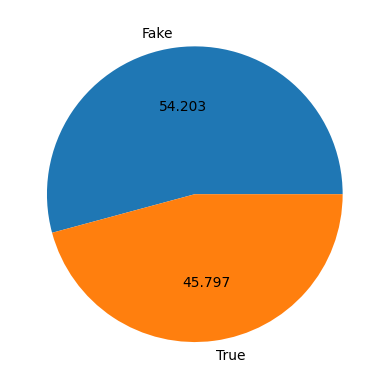

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels = ['Fake','True'], autopct="%0.3f")
plt.show()

In [15]:
# the data is balanced approximately
# if the data is unbalanced we can use
# 1- Overspampling technique in which we can balance the minority sample by duplicating it
# 2- Synthetic Minority oversampling technique(SMOTE) in which generate minority sample by interpolating the existing samples
# 3- When dealing with extremely imbalanced datasets (e.g., fraud detection), the problem can be framed as an anomaly detection task.
# In such cases, models like One-Class SVM, Isolation Forests, and Autoencoders are effective.

In [16]:
# Why to use NLTK
# Tokenizing news articles to break them down into words/sentences.
# Removing stopwords to focus on meaningful terms.
# Stemming or lemmatizing words to normalize text.

# Part of speech tagging to understand the grammatical structure of sentences.
import nltk


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import nltk
nltk.download('punkt_tab')  # Download the required tokenizer



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Fill NaN values with an empty string, then apply len() to get the number of characters
df['text_characters'] = df['text'].fillna('').apply(len)





In [20]:
df.head()

,title,text,Label,text_characters
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,Fake,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake,3597
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",Fake,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake,2346
